In [18]:
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
from IPython.core.display import HTML, Latex, Markdown

In [19]:
HTML("""
<h3><center>Confusion matrix</center></h3>
<center>
<table width="400" align="center">
<tr>
<th> </th>
<th rowspan="1" colspan="2" align="center"  style="border: 1px">+</th>
<th rowspan="1" colspan="2" align="center"  style="border: 1px">-</th>
</tr>
<tr>
<td>+</td>
<td colspan="2" text-align="center" style="background: rgba(0,255,0,0.15)">TP</td>
<td colspan="2" align="center" style="background: rgba(255,0,0,0.2)">FN (type II)</td>
</tr>
<tr>
<td></td>
<td colspan="2" text-align="center" style="text-align=center;background: rgba(0,255,0,0.15)">True positives</td>
<td colspan="2" align="center" style="background: rgba(255,0,0,0.2)">False negatives</td>
</tr>
<tr>
<td>-</td>
<td colspan="2" align="center" style="background: rgba(255,0,0,0.2)">FP (type I)</td>
<td colspan="2" text-align="center" style="background: rgba(0,255,0,0.15)">TN</td>
</tr>
<tr>
<td></td>
<td colspan="2" align="center" style="background: rgba(255,0,0,0.2)">False positives</td>
<td colspan="2" text-align="center" style="background: rgba(0,255,0,0.15)">True negatives</td>
</tr>
</table></center>
""")

,+,-
+,TP,FN (type II)
,True positives,False negatives
-,FP (type I),TN
,False positives,True negatives


## Metrics

**Classifications**
- True positive (TP, positive classified as poitive)
- True negative (TN, negative classified as negative)
- False positive (FP, negative classified as poitive)
- False negative (FN, positive classified as negative)
- Confusion matrix:
- Accuracy: when target classes are balanced
$$\frac{TP+TN}{Total}=\frac{TP+TN}{TP+TN+FP+FN}$$  
- Precision, or PPV (positive predictive value):
$$PPV=\frac{TP}{TP+FP}$$ 
- Recall, Sensitivity, or TPR:
$$TPR=\frac{TP}{TP+FN}$$ 
- Specificity, selectivity, or TNR:
$$TNR=\frac{TN}{TN+FP}$$ 
- fall out, or FPR
$$FPR=\frac{FP}{FP+TN}$$
- F1 score: harmonic mean of 
$$\frac{2*\rm{Precision}*{Recall}}{\rm{Precision}+\rm{Recall}}=\frac{2TP}{2TP+FP+FN}$$ 
- Log loss, if classifier output is probability
$$ \rm{logloss} = \frac{-1}{N}\sum_{i=1}^N y_i\log(p(y_i))+(1-y_i)\log(1-p(y_i))$$
- Gini score (coefficient), 
<br> 

**Regression**
- MSE (mean squared error). Most commonly used
$$MSE=\frac{1}{N}\sum_{i=1}^N(y_i -\hat y_i)^2$$
- MAE (mean absolute error). More robust to outlier
$$MAE=\frac{1}{N}\sum_{i=1}^N |y_i -\hat y_i|$$
- MedAE (median absolute error). Robust to outlier
$$MedAE=\rm{median} (|y_1-\hat y_1|, ..., |y_N -\hat y_N|$$
- R-squared / Adjusted $R^2$
 - how good we reduce noise compared with a mean estimator
$$R^2 = 1-\frac{MSE(model)}{MSE(baseline)}=1-\frac{\sum_i^N(y_i-\hat y_i)^2}{\sum_i^N(\bar y_i-y_i)^2}$$
 - R-squared does not penalize for adding new features that add no value to the model, use adjusted R--squared, k is number of features, n is number of samples
$$\bar R^2 = 1-(1-R^2)\left[\frac{n-1}{n-(k+1)}\right]$$
- Explained variance score (EVS)
$$EVS=1-\frac{var(y-\hat y)}{var(y)}$$
- AIC (Akaike Information Criterion), log-likelihood functions for common predictive models include MSE for linear regression and log loss (binary cross entropy) for binary classification.
$$2M-2n\log(L(M))$$
- BIC (Bayesian Information Criterion), the derivation of BIC under the Bayesian probability framework means that if a selection of candidate models includes a true model for the dataset, then the probability that BIC will select the true model increases with the size of the training dataset. This cannot be said for the AIC score. A downside of BIC is that for smaller, less representative training datasets, it is more likely to choose models that are too simple.
$$M\log(n+2)-2n\log(L(M)$$
- MDL (Minimum Description Length), the minimum of the sum of the number of bits required to represent the data and the model. The negative log-likelihood of the model parameters (theta) and the negative log-likelihood of the target values (y) given the input values (X) and the model parameters (theta). MDL is very similar to BIC.
$$MDL=-\log(P(\theta))–\log(P(y|X, \theta))$$

## ROC, AUC, PR curve
- Receiver operating characteristic (ROC): TPR vs. FPR for various threshold. Intuitive to understand, normally it's impossible to reduce both increase true positive rate and reduce false positive error. A straight $45^o$ line is ROC for random coin toss.
 - when shift threshold toward negative to have hight TPR, the probaility of false positive would also increase.
 - Can not get to point (0, 1) unless the data can be perfectly separated.
- AUC area under the ROC curve, value between 0 and 1. Typically the larger the better
- Precision recall curve: Precision vs. recall when the classes are imbalanced.

[-4, 5, 0, 0.5]

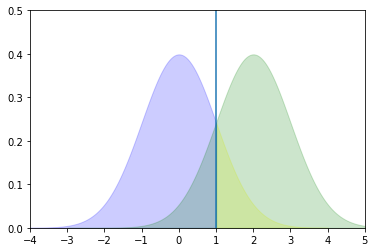

In [21]:
th=1
dist1 = stats.norm(0, 1)
dist2 = stats.norm(2, 1)

#x11=np.linspace(dist1.ppf(0.001), dist1.ppf(0.75), 100)
#x12=np.linspace(dist1.ppf(0.75), dist1.ppf(0.999), 100)
x11=np.linspace(-4, 1, 100)
x12=np.linspace(1, 4, 100)
y11=dist1.pdf(x11)
y12=dist1.pdf(x12)

#x21=np.linspace(dist2.ppf(0.001), dist2.ppf(0.75), 100)
#x22=np.linspace(dist2.ppf(0.75), dist2.ppf(0.999), 100)
x21=np.linspace(-3, 1, 100)
x22=np.linspace(1, 5, 100)
y21=dist2.pdf(x21)
y22=dist2.pdf(x22)

plt.stackplot(x11, y11, color='b', alpha=0.2)
plt.stackplot(x12, y12, color='yellow', alpha=0.2)
plt.stackplot(x21, y21, color='g', alpha=0.2)
plt.stackplot(x22, y22, color='g', alpha=0.2)
#plt.stackplot(x1, y1, y2, alpha=0.2, baseline='zero')
plt.axvline(x=th)
plt.axis([-4, 5, 0, .5])

## Multiclass metrics
- **macro**: simply calculates the mean of the binary metrics, giving equal weight to each class.
- **weighted**: compute the average of binary metrics in which each class's score is weighted by its presence (ratio) in the true data sample.
- **micro**: give each sample-class pair an equal contribution to the overall metric.

## Clustering metrics
- 

## Distance or similarity
- Euclidean distance, this is well known metric between two points in multi-dimensional space. Straight line between two points in Euclidean space. L2 norm
$$\sqrt{\sum_i (x_i-y_i)^2}$$
- Manhanttan distance, distance between two points follow a grid path (like streets in Manhattan), L1 norm
$$\sum_i |x_i-y_i|$$
- Mahalanobis distance. measure the distancerelative to the centroid in multivariate data (not circular/spherical, but elliptical)
$$\sqrt{(X_A-X_B)^T * Cov^{-1} * (X_A-X_B)}$$, 
where C is sample covariance matrix. Distance normalized by covariance matrix
- Cosine similarity, cosine of the angle between two vectors. the smaller the angle, the larger similarity. value between [-1, 1], independent of their magnitude.
$$\cos(\theta) = \frac{<A, B>}{|A|_2|B|_2}=\frac{\sum_i a_ib_i}{\sqrt{\sum_i a_i^2}\sqrt{\sum_i b_i^2}}$$
- Jaccard similarity, on set. the ratio of intersection set size over union set size
$$J(A,B)=\frac{|A\cap B|}{|A\cup B|}$$

## Model selection
- Cross validation
- Regularization
 - Lasso: shrink some coefficients to 0, feature selection
 $$ Cost + \lambda||\theta||_1$$
 - Ridge: make coefficients smaller
 $$ Cost + \lambda||\theta||_2^2$$
 - Elastic Net: tradeof between feature selection and small coefficients
 $$Cost+\lambda\Big[(1-\alpha)||\theta||_1+\alpha||\theta||_2^2\Big]$$

## Learning theory
- Union bound: Let $S_1,...,S_k$ be $k$ events
$$P(A_1\cup ...\cup A_k)\leqslant P(A_1)+...+P(A_k)$$
- Jensen's inequality: Let $f$ be a convex function and $X$ a random variables
$$E[f(X)]\geqslant f(E[X])$$
- VC dimension: the Vapnik-Chervonenkis (VC) dimension of a given infinite hypothesis class $H$, noted $VC(H)$ is the size of the largest set that is shattered by $H$. The $VC$ dimension of $\mathcal{H}=\{\rm{set of linear classifiers in 2 dimensions}\}$ is 3.
- Theorem (Vapnik): Let $H$ be given, with $\textrm{VC}(\mathcal{H})=d$ and $m$ the number of training examples. With probability at least $1−\delta$, we have:
$$\epsilon(\widehat{h})\leqslant \left(\min_{h\in\mathcal{H}}\epsilon(h)\right) + O\left(\sqrt{\frac{d}{m}\log\left(\frac{m}{d}\right)+\frac{1}{m}\log\left(\frac{1}{\delta}\right)}\right)$$

### Bais-Variance trade off